## 1.1.1 Пример

**Задача:**

Проведем прямую 𝑦 = 𝑚𝑥 + 𝑏 через экспериментальные точки.

Matplotlib is building the font cache; this may take a moment.


array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

np.float64(0.9999999999999999)

np.float64(-0.9499999999999995)

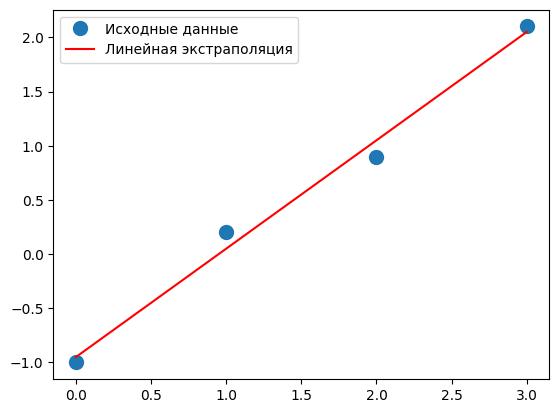

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение и построим A по X
a = np.vstack([x, np.ones(len(x))]).T
display(a)

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(a, y, rcond=None)[0]
display(m, c)

# Построим график полученной прямой и укажем на нём точки
plt.plot(x, y, "o", label="Исходные данные", markersize=10)
plt.plot(x, m * x + c, "r", label="Линейная экстраполяция")
plt.legend()
plt.show()

## 1.1.2 Пример

**Задача:**

Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3. Необходимо найти коэффициенты полинома второго порядка по методу наименьших квадратов.

'x:'

array([-4.50469915, -4.43712004, -2.61572612, -2.31292722, -1.39222985,
        0.38465669,  0.82671623,  1.52265747,  2.63969759,  3.95057384,
        4.94781245])

'y:'

array([25.28307752, 16.01870819,  9.37446861,  3.51674981,  0.97778843,
       -0.18289663,  0.87051005,  3.93396565,  9.02667843, 16.424706  ,
       24.93694706])

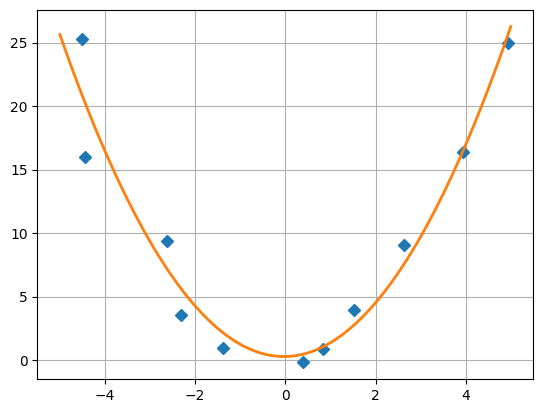

In [4]:
from numpy import *
from numpy.random import *

# Генерируем случайные X и Y
delta = 1.0
x = np.linspace(-5, 5, 11)
y = x ** 2 + delta * (rand(11) - 0.5)
x += delta * (rand(11) - 0.5)

# Записываем данные в файл
x.tofile("x_data.txt", "\n")
y.tofile("y_data.txt", "\n")

# Читаем данные из файлов
x = fromfile("x_data.txt", float, sep="\n")
y = fromfile("y_data.txt", float, sep="\n")
display("x:", x, "y:", y)

# Нахождение коэффициентов функции вида y = (a * x)^2 + (b * x) + c методом наименьших квадратов,
# задаём вектор m = [x ** 2, x, E]
m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5, 5]...
x_prec = linspace(-5, 5, 101)

# Рисуем точки
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], "-", lw=2)
plt.grid()

## 1.1.3 Пример

**Задача:**

По данным предыдущего примера постройте экстраполяционный полином третьего порядка. Затем представьте собственные данные и постройте экстраполяцию полиномами первой, второй и третьей степени.

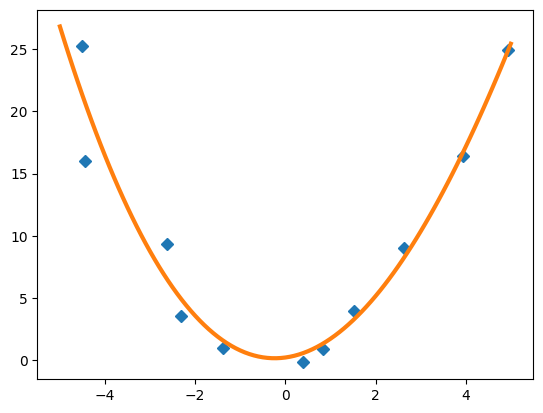

In [5]:
# Нахождение коэффициентов функции вида y = (a * x) ^ 3 + (b * x) ^ 2 + (c * x) + d методом наименьших квадратов,
# задаём вектор m = [x ** 3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond=None)[0]

# На отрезке [-5, 5]...
x_prec = linspace(-5, 5, 101)

# Рисуем точки
plt.plot(x, y, "D")
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], "-", lw=3)

**Задание**:

Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

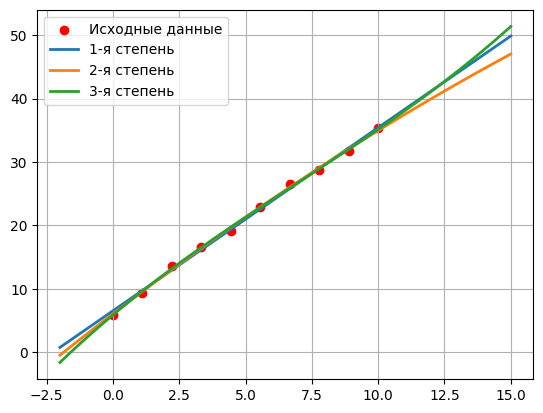

In [6]:
x = linspace(0, 10, 10)
y = 3 * x + 5 + rand(10) * 2
x_prec = linspace(-2, 15, 200)

# Создаём полином 1-й степени
m1 = vstack((x, ones(len(x)))).T
s1 = np.linalg.lstsq(m1, y, rcond=None)[0]
y1 = s1[0] * x_prec + s1[1]

# Создаём полином 2-й степени
m2 = vstack((x ** 2, x, ones(len(x)))).T
s2 = np.linalg.lstsq(m2, y, rcond=None)[0]
y2 = s2[0] * x_prec ** 2 + s2[1] * x_prec + s2[2]

# Создаём полином 3-й степени
m3 = vstack((x ** 3, x ** 2, x, ones(len(x)))).T
s3 = np.linalg.lstsq(m3, y, rcond=None)[0]
y3 = s3[0] * x_prec ** 3 + s3[1] * x_prec ** 2 + s3[2] * x_prec + s3[3]

# Создаём графики
plt.scatter(x, y, color="red", label="Исходные данные")
plt.plot(x_prec, y1, label="1-я степень", lw=2)
plt.plot(x_prec, y2, label="2-я степень", lw=2)
plt.plot(x_prec, y3, label="3-я степень", lw=2)
plt.grid()
plt.legend()
plt.show()

## 1.1.4 Пример

**Задача:**

Проверить гипотезу, что точечно заданная функция ложится на кривую вида f(x, b) = b0 + b1 * exp(-b2 * x^2).

array([0.24517465, 0.76135409, 0.52416617])

'Линейное отклонение:'

np.float64(0.00022981226949891329)

'Квадратичное отклонение:'

np.float64(0.11858038530281709)

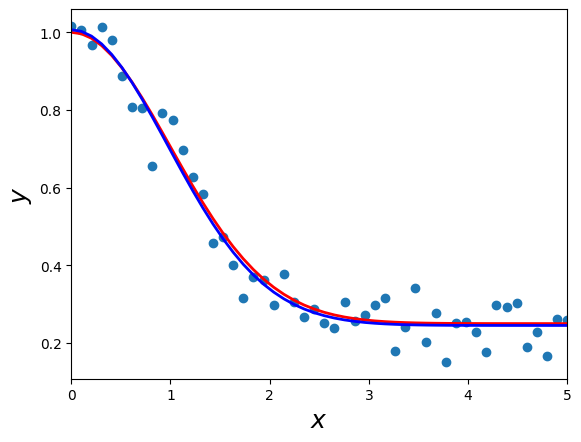

In [7]:
from scipy.optimize import curve_fit

# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаём теоретически правильные значения точке yi (без шума)
y = f(xdata, *beta)
# "Зашумляем" эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
display(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
display("Линейное отклонение:", lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
display("Квадратичное отклонение:", fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
plt.show()

## 1.1.5 Пример

**Задача: Проверить гипотезу, что функция ложится на следующие кривые:**
1) f(x, b) = b0 + b1 * x
2) f(x, b) = b0 + b1 * x + b2 * x^2
3) f(x, b) = b0 + b1 * ln(x)
4) f(x, b) = b0 * x^b1

array([0.26538853, 0.74917839])

np.float64(0.0001706364618024687)

np.float64(0.15004240800309013)

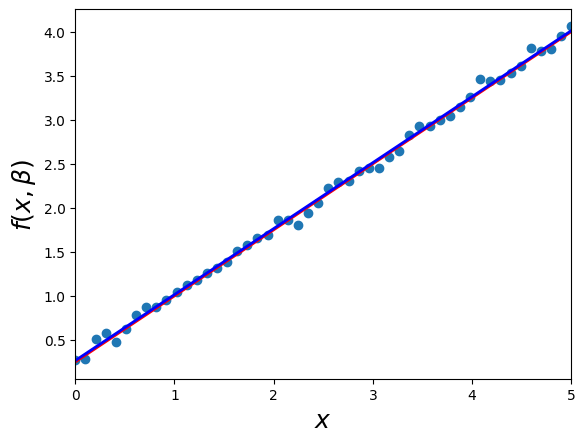

array([0.25903495, 0.75611998, 0.49746503])

np.float64(0.00013473997539682728)

np.float64(0.11235903511308233)

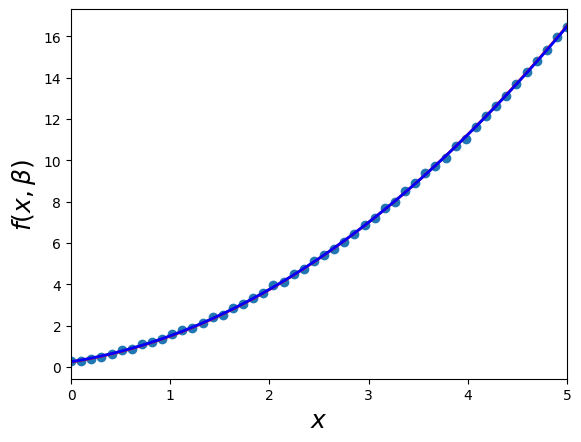

array([1.00001   , 2.00061462])

np.float64(5.2636594381933865e-05)

np.float64(0.12171904319423606)

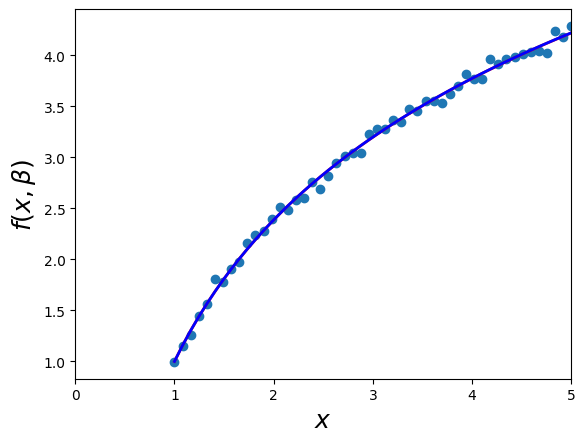

array([1.00229566, 1.99909607])

np.float64(3.788495100030404e-06)

np.float64(0.08952397218532239)

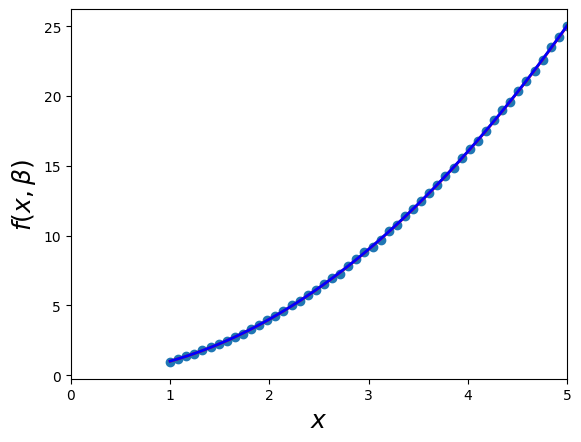

In [8]:
# 1) Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)

def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
display(beta_opt)

lin_dev = sum(beta_cov[0])
display(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
display(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 2) Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)

def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
display(beta_opt)

lin_dev = sum(beta_cov[0])
display(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
display(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 3) Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)

def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
display(beta_opt)

lin_dev = sum(beta_cov[0])
display(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
display(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

# 4) Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)

def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
display(beta_opt)

lin_dev = sum(beta_cov[0])
display(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
display(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, "r", lw=2)
ax.plot(xdata, f(xdata, *beta_opt), "b", lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

**Задача:**

Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

Линейная: коэффициенты [4.81720854 1.9318972 ]
Квадратичная: коэффициенты [ 4.47879651  2.13917457 -0.02072774]
Логарифмическая: коэффициенты [0.3713231  8.66103406]
Степенная: коэффициенты [3.70900951 0.77231816]


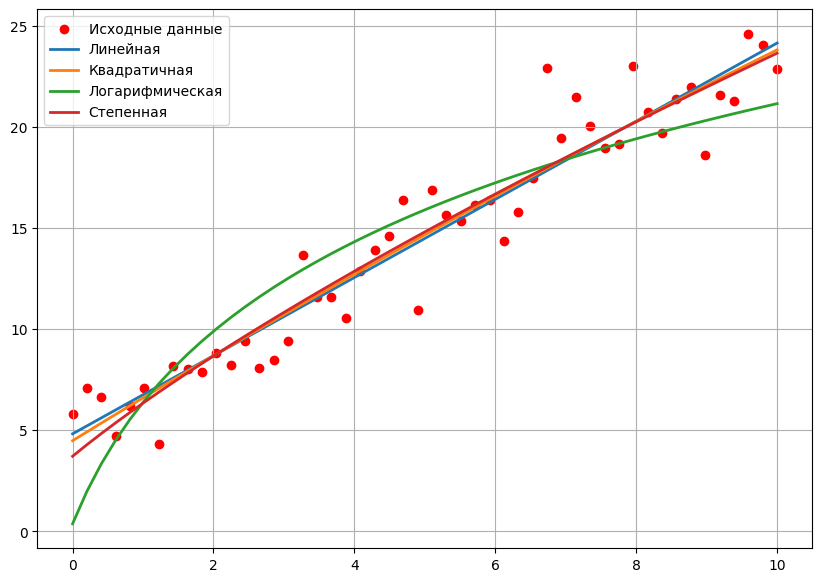

In [9]:
xdata = np.linspace(0, 10, 50)
ydata = 5 + 2 * xdata + np.random.randn(50) * 2

def f1(x, b0, b1):
    return b0 + b1 * x

def f2(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2

def f3(x, b0, b1):
    return b0 + b1 * np.log(x + 1)

def f4(x, b0, b1):
    return b0 * (x + 1) ** b1

plt.figure(figsize=(10, 7))
plt.scatter(xdata, ydata, color="red", label="Исходные данные")

functions = [
    ("Линейная", f1),
    ("Квадратичная", f2),
    ("Логарифмическая", f3),
    ("Степенная", f4),
]

for name, function in functions:
    beta_opt, beta_cov = curve_fit(function, xdata, ydata)
    yfit = function(xdata, *beta_opt)
    plt.plot(xdata, yfit, lw=2, label=f"{name}")
    print(f"{name}: коэффициенты {beta_opt}")

plt.legend()
plt.grid()
plt.show()

## 1.2.1 Пример

**Задача:**

Построим простую линейную регрессию в Python с использованием библиотеки `scikit-learn`.

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


(20, 2)

,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


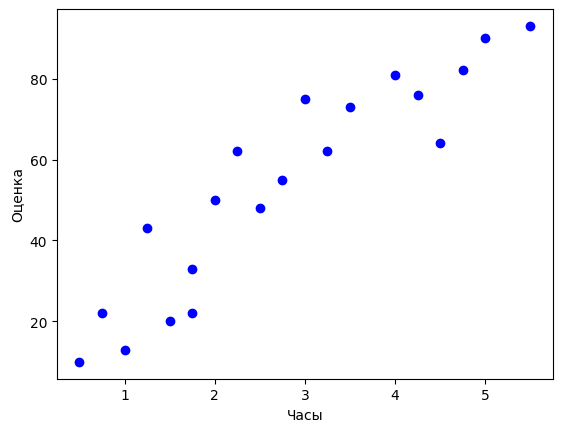

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

array([10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64,
       82, 90, 93])

np.float64(5.475400029908791)

array([17.02706744])

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


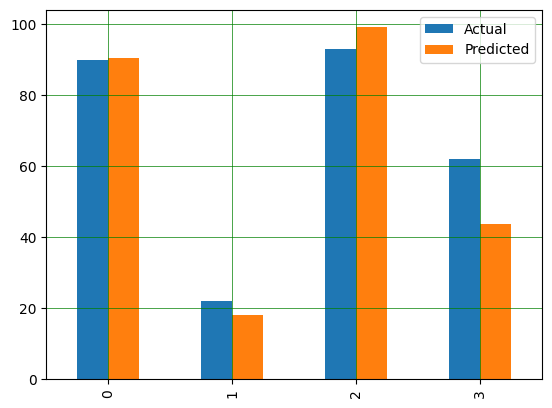

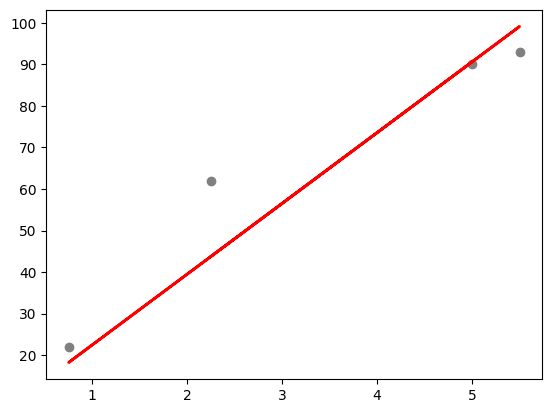

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Создадим набор данных для описания взаимосвязи между временем обучения студентом и успеваемостью
data_dict = {
    'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
    'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93],
}

dataset = pd.DataFrame(data_dict)
display(dataset.head())
display(dataset.shape)
display(dataset.describe())

plt.scatter(dataset["Учебное время"], dataset["Оценка"], color="b", label="Данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
display(x, y)

# Теперь, когда у нас есть атрибуты и метки, необходимо разделить их на обучающий и тестовый наборы.
# Приведённый фрагмент разделяет 80% данных на обучающий набор, а 20% - на набор тестов.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Далее необходимо обучить алгоритм линейной регрессии.
# Необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit().
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Приведём получившиеся коэффициенты для линии регрессии
display(regressor.intercept_, regressor.coef_)

y_pred = regressor.predict(x_test)

# Сравним фактические значения с прогнозируемыми
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

# Визуализируем результат сравнения в виде гистограммы
df.plot(kind="bar")
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

# Построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color="gray")
plt.plot(x_test, y_pred, color="red", linewidth=2)
plt.show()

**Задача:**

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы. Найдите коэффициенты линии регрессии. Постройте прогноз.

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


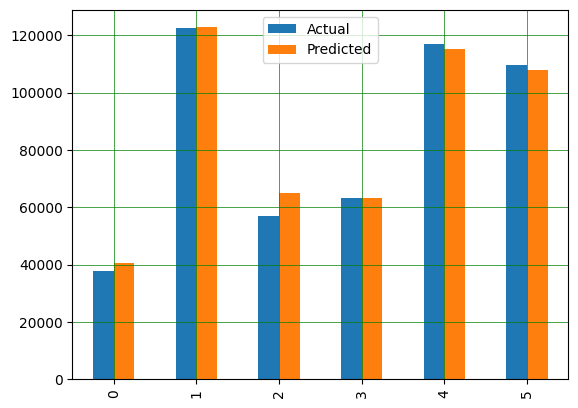

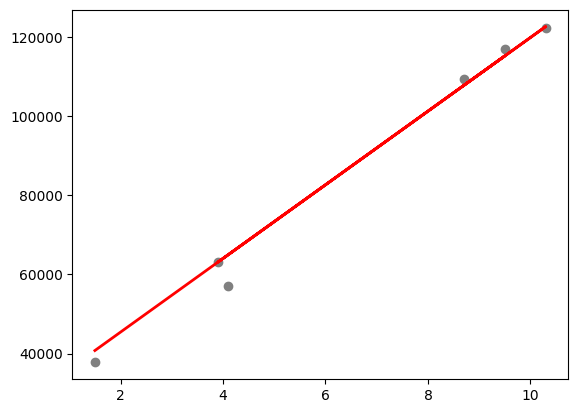

In [11]:
dataset = pd.read_csv("./datasets/salary.csv")

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

df.plot(kind="bar")
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

plt.scatter(x_test, y_test, color="gray")
plt.plot(x_test, y_pred, color="red", linewidth=2)
plt.show()

## 1.3.1 Пример

**Задача:**

Для решения задачи множественной регрессии можно задействовать метод `numpy.linalg.lstsq`.

In [12]:
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
    [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
    [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

x = np.transpose(x)
x = np.c_[x, np.ones(x.shape[0])]

linreg = np.linalg.lstsq(x, y, rcond=None)[0]
display(linreg)

array([ 0.1338682 ,  0.26840334, -0.02874936,  1.5122571 ])

## 1.3.2 Пример

**Задача:**

Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки `scikit-learn`.

In [13]:
from sklearn import metrics

# Формируем DataFrame из двух списков
new_y = np.array(y).transpose()
df_y = pd.DataFrame(new_y)

new_x = np.array(x).transpose()
df_x = pd.DataFrame(new_x)

df_y = df_y.rename(columns = {0: "y"}, inplace=False)
df_x = df_x.rename(columns = {0: "x1", 1: "x2", 2: "x3"}, inplace=False)

frames = [df_y, df_x]
dataset = pd.concat(frames, axis=1, join="inner")
display(dataset.head())

# Изучим данные
display(dataset.shape)
display(dataset.describe())

# Разделим данные на метки и атрибуты
x = dataset[["x1", "x2", "x3"]]
y = dataset["y"]

# Разделим данные на обучающую и тестовые выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тот же код, чт ои раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=["Coefficient"])
display(coeff_df)

# Чтобы сделать прогнозы на тестовых данных, выполняем следующий код
y_pred = regressor.predict(x_test)
df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
display(df)

# Последний шаг - оценить производительность алгоритма. Мы делаем это, найдя значения для MSE
display("Mean squared error:", metrics.mean_squared_error(y_test, y_pred))


,y,x1,x2,x3,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
0,1,0.0,2.0,4.0,1.0,5.0,4.0,5.0,9.0,9.0,...,8.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0
1,2,4.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,5.0,...,8.0,7.0,8.0,6.0,8.0,9.0,2.0,1.0,5.0,6.0
2,3,4.0,1.0,2.0,5.0,6.0,7.0,8.0,9.0,7.0,...,4.0,3.0,1.0,2.0,3.0,4.0,1.0,3.0,9.0,7.0
3,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


(4, 24)

,y,x1,x2,x3,3,4,5,6,7,8,...,13,14,15,16,17,18,19,20,21,22
count,4.000000,4.000000,4.00,4.000000,4.000000,4.000000,4.00,4.00000,4.000000,4.00000,...,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,2.500000,2.250000,1.25,2.250000,2.500000,4.000000,4.25,5.00000,6.500000,5.50000,...,5.25000,4.250000,4.000000,3.500000,4.250000,4.750000,2.500000,2.750000,5.000000,4.750000
std,1.290994,2.061553,0.50,1.258306,1.914854,2.160247,2.50,2.94392,3.785939,3.41565,...,3.40343,2.753785,3.559026,2.380476,2.986079,3.304038,2.380476,2.362908,3.265986,2.629956
min,1.000000,0.000000,1.00,1.000000,1.000000,1.000000,1.00,1.00000,1.000000,1.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,0.750000,1.00,1.750000,1.000000,3.250000,3.25,4.00000,5.500000,4.00000,...,3.25000,2.500000,1.000000,1.750000,2.500000,3.250000,1.000000,1.000000,4.000000,4.000000
50%,2.500000,2.500000,1.00,2.000000,2.000000,4.500000,4.50,5.50000,8.000000,6.00000,...,6.00000,4.500000,3.500000,3.500000,4.000000,4.500000,1.500000,2.000000,5.000000,5.500000
75%,3.250000,4.000000,1.25,2.500000,3.500000,5.250000,5.50,6.50000,9.000000,7.50000,...,8.00000,6.250000,6.500000,5.250000,5.750000,6.000000,3.000000,3.750000,6.000000,6.250000
max,4.000000,4.000000,2.00,4.000000,5.000000,6.000000,7.00,8.00000,9.000000,9.00000,...,8.00000,7.000000,8.000000,6.000000,8.000000,9.000000,6.000000,6.000000,9.000000,7.000000


,Coefficient
x1,-0.327273
x2,-0.272727
x3,-1.018182


,Actual,Predicted
2,3,2.0


'Mean squared error:'

1.0000000000000009

**Задача**:

Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


'Mean squared error:'

4666.344787588374

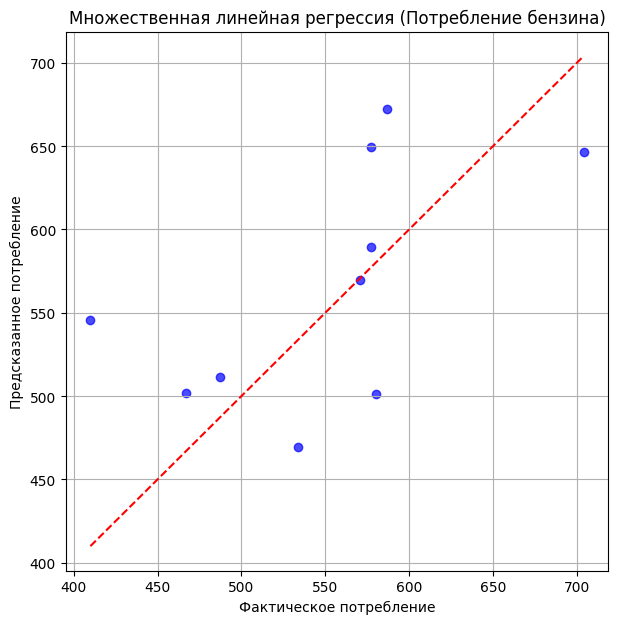

In [14]:
dataset = pd.read_csv("datasets/petrol_consumption.csv")
display(dataset.head())

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
display("Mean squared error:", metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Фактическое потребление")
plt.ylabel("Предсказанное потребление")
plt.title("Множественная линейная регрессия (Потребление бензина)")
plt.grid()
plt.show()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


'Mean squared error:'

0.3844711978201245

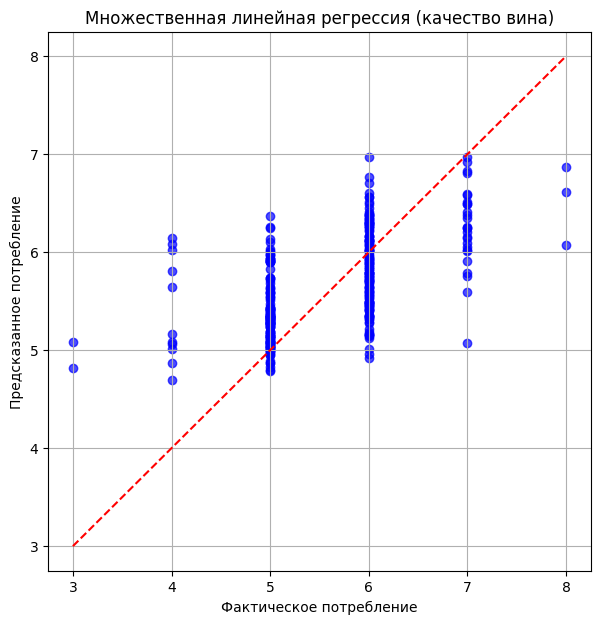

In [15]:
dataset = pd.read_csv("datasets/winequality_red.csv")
display(dataset.head())

x = dataset.drop("quality", axis=1)
y = dataset["quality"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
display("Mean squared error:", metrics.mean_squared_error(y_test, y_pred))

plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Фактическое потребление")
plt.ylabel("Предсказанное потребление")
plt.title("Множественная линейная регрессия (качество вина)")
plt.grid()
plt.show()

**Задача**:

Экспериментально получены N − значений величины Y при различных значениях величины X. Построить полиномы первой и второй степени, аппроксимирующие результаты эксперимента, с применением метода наименьших квадратов. Результаты выводятся в виде таблиц значений и графиков, полученных полиномов.

Таблица результатов:
     X  Y (эксперимент)  Y1 (1-я степень)  Y2 (2-я степень)
0  5.0              3.0            3.0476            2.9286
1  5.2              2.0            2.9619            2.9857
2  5.4              5.0            2.8762            2.9714
3  5.6              2.0            2.7905            2.8857
4  5.8              2.0            2.7048            2.7286
5  6.0              3.0            2.6190            2.5000


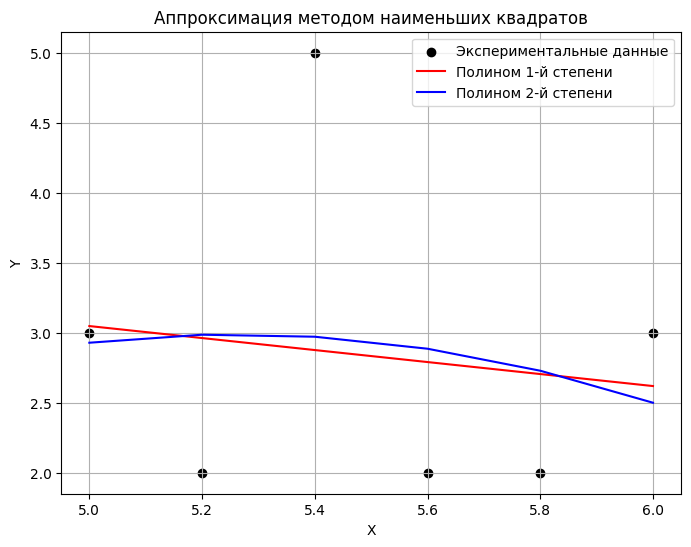

In [17]:
# Входные данные
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3.0, 2.0, 5.0, 2.0, 2.0, 3.0])

# Аппроксимация полиномами 1-й и 2-й степени
coeffs1 = np.polyfit(x, y, 1)  # линейная аппроксимация
coeffs2 = np.polyfit(x, y, 2)  # квадратичная аппроксимация

# Создаём полиномиальные функции
poly1 = np.poly1d(coeffs1)
poly2 = np.poly1d(coeffs2)

# Вычислим аппроксимированные значения
y1 = poly1(x)
y2 = poly2(x)

df = pd.DataFrame({
    'X': x,
    'Y (эксперимент)': y,
    'Y1 (1-я степень)': y1,
    'Y2 (2-я степень)': y2
})
print("Таблица результатов:")
print(df.round(4))

plt.figure(figsize=(8,6))
plt.scatter(x, y, color='black', label='Экспериментальные данные')
plt.plot(x, y1, '-r', label='Полином 1-й степени')
plt.plot(x, y2, '-b', label='Полином 2-й степени')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Аппроксимация методом наименьших квадратов')
plt.legend()
plt.grid(True)
plt.show()
